# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import json
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import re
import glob
import os

from scipy import stats
from scipy.integrate import trapz

import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 20, 'max_rows', 20, 'max_colwidth', 10)

In [2]:
# 데이터 분리
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# 전처리
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Binarizer

# 머신러닝 알고리즘
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import make_scorer

# 평가 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
# 타이타닉 데이터로 실습해보기
train_df = pd.read_csv(r'F:\OneDrive - 퍼즐데이터\01_sejin\01_Python\02_practice\12_ADP실기\01_실기연습\글로벌엑스퍼트-타이타닉-강의자료-학습도우미\titanic\train.csv')
test_df = pd.read_csv(r'F:\OneDrive - 퍼즐데이터\01_sejin\01_Python\02_practice\12_ADP실기\01_실기연습\글로벌엑스퍼트-타이타닉-강의자료-학습도우미\titanic\test.csv')
# diabetes_df = pd.read_csv(r'F:\OneDrive - 퍼즐데이터\01_sejin\01_Python\02_practice\12_ADP실기\01_실기연습\3장\diabetes.csv')
# diabetes_df = pd.read_csv(r'C:\puzzledata\OneDrive - 퍼즐데이터\01_sejin\03_ADP\02_실기\03_연습\3장\diabetes.csv')

In [ ]:
# # train과 test가 나눠져 있지 않은 경우 아래처럼 train과 test를 나눈다.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y )

In [ ]:
# 데이터 그룹핑시 사용

# temp = data.copy()
# temp['Initial'] = 0
# temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

# temp.loc[temp['Initial'] == 'Dona', 'Initial'] = 'Mrs'

# temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

# temp['NumName'] = temp['LastName'].factorize()[0]
# temp = temp.reset_index(drop=True)

# temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x: x.fillna(x.mean()))

# temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
# temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

# temp['Age_Range'] = pd.qcut(temp['Age'], 10)

# temp['Agroup'] = 0
# temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
# temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
# temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
# temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
# temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
# temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
# temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
# temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
# temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
# temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
# temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
# temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
# temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
# temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
# temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

# temp.loc[(temp['Sex'] == 'male'), 'Sex'] = 1
# temp.loc[(temp['Sex'] == 'female'), 'Sex'] = 2
# temp.loc[(temp['Age'] < 1), 'Sex'] = 3

# temp.loc[(temp['SibSp'] == 0) & (temp['Parch'] == 0), 'Alone'] = 1
# temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

# temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')
# temp = temp.reset_index(drop=True) 

# temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

# temp['NumTicket'] = temp['Initick'].factorize()[0]

# temp['Fare_Range'] = pd.qcut(train['Fare'], 10)

# temp['Fgroup'] = 0
# temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
# temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
# temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
# temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
# temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
# temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
# temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
# temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
# temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
# temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

# temp['Inicab'] = 0
# temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
# temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 1)), 'Inicab'] = 'X'
# temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 2)), 'Inicab'] = 'Y'
# temp.loc[((temp['Cabin'].isnull()) & (temp['Pclass'].values == 3)), 'Inicab'] = 'Z'

# temp['Inicab'] = temp['Inicab'].factorize()[0]

# temp.loc[(temp.Embarked.isnull()), 'Embarked'] = 'S'

# temp['Embarked'] = temp['Embarked'].factorize()[0]

# temp['Priority'] = 0
# temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
# temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
# temp.loc[(temp['Age'] < 1), 'Priority'] = 3
# temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
# temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
# temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
# temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

# temp['FH'] = 0
# temp.loc[(temp['Sex'] == 1), 'FH'] = 0
# temp.loc[(temp['Sex'] == 2), 'FH'] = 1
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
# temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
# temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

# temp['MH'] = 0
# temp.loc[(temp['Sex'] == 2), 'MH'] = 0
# temp.loc[(temp['Sex'] == 1), 'MH'] = 1
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
# temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
# temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

# temp['FL'] = 0
# temp.loc[(temp['Sex'] == 1), 'FL'] = 0
# temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
# temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
# temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
# temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

# temp['ML'] = 0
# temp.loc[(temp['Sex'] == 2), 'ML'] = 0
# temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
# temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
# temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
# temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

# temp['F1'] = temp['Priority']
# temp['F2'] = temp['FH']
# temp['F3'] = temp['MH']
# temp['F4'] = temp['FL']
# temp['F5'] = temp['ML']
# temp['F6'] = temp['Initial']
# temp['F7'] = temp['Fgroup']
# temp['F8'] = temp['NumName']
# temp['F9'] = temp['NumTicket']
# temp['F10'] = temp['Family']
# temp['F11'] = temp['Embarked']
# temp['F12'] = temp['Sex']
# temp['F13'] = temp['Pclass']

# dfl = pd.DataFrame() # for label encoding
# good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13']
# dfl[good_columns] = temp[good_columns]

# dfl_enc = dfl.apply(LabelEncoder().fit_transform)

# dfh = dfl.copy()
# one_hot_cols = dfh.columns.tolist()
# dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

In [ ]:
train = train_df.copy()
test = test_df.copy()

In [ ]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

In [ ]:
train.shape

In [ ]:
data.info()

In [ ]:
dfh_enc

In [ ]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [ ]:
train

In [ ]:
X_test = test
X_train = train

# 데이터 확인

## y값 정규성 확인

In [ ]:
y_target

<AxesSubplot:xlabel='Outcome', ylabel='Density'>

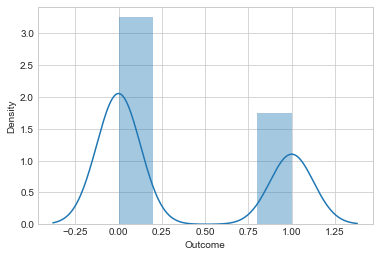

In [13]:
sns.distplot(y_target)

In [ ]:
sns.distplot(log1p(y_target))

In [ ]:
sns.distplot(Stan)

## x값 선형성 확인

In [ ]:
train_1

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=4)

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'year',
       'month', 'day', 'hour']

for i , feature in enumerate(features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='count',data=train_1 , ax=axs[row][col])

# 전처리

## 데이터 분리

In [5]:
# 전처리가 모두 끝나고 scaling은 하지 않은 상태에서 데이터 분리를 시행한다.
X_features = diabetes_df.iloc[:, :-1]
y_target = diabetes_df.iloc[:, -1]

X_features.shape[0]/diabetes_df.shape[0]
y_target.shape[0]/diabetes_df.shape[0]

1.0

In [7]:
y_target.value_counts()/y_target.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156, stratify=y_target)

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/y_train.count())
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/y_test.count())

학습 세트 Shape:(614, 8), 테스트 세트 Shape:(154, 8)
 학습 세트 레이블 값 분포 비율
0    0.651466
1    0.348534
Name: Outcome, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.649351
1    0.350649
Name: Outcome, dtype: float64


### K-fold(전처리 후 진행해야 함)
- 1,2,3,4 폴드로 한번씩 나눠서 뿌리기 때문에 예측도 같이 돌려야 함

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
n_iter = 0
cv_accuracy = []

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(X_features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y_target[train_index], y_target[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 

### Stratified K-fold(전처리 후 진행해야 함)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(X_features, y_target):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y_target[train_index], y_target[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 

### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

## 범주 데이터 수치화

### get_dummies

In [ ]:
col_list = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

col_ohe = pd.get_dummies(X_train[col_list])

X_train_ohe = pd.concat([X_train, col_ohe], axis=1)
X_train = X_train_ohe.drop(col_list, axis=1)

### Lable Incoding(미완)

In [ ]:
from sklearn.preprocessing import LabelEncoder

col_list=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(col_list)
labels = encoder.transform(col_list)
print('인코딩 변환값:',labels)

In [ ]:
print('인코딩 클래스:',encoder.classes_)

In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

### one-hot Incoding(미완)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

col_list=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(col_list)
labels = encoder.transform(col_list)

# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

## Scaler
* y부터 스케일링 시작
* X의 경우 중요한 feature를 중심으로 골라 분포를 확인 후 스케일링
* X_train을 fit 시키고 X_test에 transform하는 경우가 있음
* 2차원만 스케일링이 가능하므로 DataFrame 형태만 처리 됨

### StandardScaler

In [10]:
# X_features scaling
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_S = pd.DataFrame(scaler.transform(X_train), 
                                       index=X_train.index, columns=X_train.columns)
X_test_S = pd.DataFrame(scaler.transform(X_test), 
                           index=X_test.index, columns=X_test.columns)
display(X_test_S.describe().T)

# y_target scaling
scaler = StandardScaler()
scaler = scaler.fit(y_train)
y_train_S = pd.DataFrame(scaler.transform(y_train), 
                                       index=y_train.index, columns=y_train.columns)
y_test_S = pd.DataFrame(scaler.transform(y_test), 
                           index=y_test.index, columns=y_test.columns)
display(y_test_S.describe().T)

### MinMax

In [ ]:
# X_features scaling
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_S = pd.DataFrame(scaler.transform(X_train), 
                                       index=X_train.index, columns=X_train.columns)
X_test_S = pd.DataFrame(scaler.transform(X_test), 
                           index=X_test.index, columns=X_test.columns)
display(X_test_S.describe().T)

# y_target scaling
scaler = MinMaxScaler()
scaler = scaler.fit(y_train)
y_train_S = pd.DataFrame(scaler.transform(y_train), 
                                       index=y_train.index, columns=y_train.columns)
y_test_S = pd.DataFrame(scaler.transform(y_test), 
                           index=y_test.index, columns=y_test.columns)
display(y_test_S.describe().T)

### Normalizer()

In [ ]:
# X_features scaling
scaler = Normalizer()
scaler = scaler.fit(X_train)
X_train_S = pd.DataFrame(scaler.transform(X_train), 
                                       index=X_train.index, columns=X_train.columns)
X_test_S = pd.DataFrame(scaler.transform(X_test), 
                           index=X_test.index, columns=X_test.columns)
display(X_test_S.describe().T)

# y_target scaling
scaler = Normalizer()
scaler = scaler.fit(y_train)
y_train_S = pd.DataFrame(scaler.transform(y_train), 
                                       index=y_train.index, columns=y_train.columns)
y_test_S = pd.DataFrame(scaler.transform(y_test), 
                           index=y_test.index, columns=y_test.columns)
display(y_test_S.describe().T)

### Log1p

In [ ]:
# X_features scaling
X_train_S = pd.DataFrame(np.log1p(X_train), index=X_train.index, columns=X_train.columns)
X_test_S = pd.DataFrame(np.log1p(X_test), index=X_test.index, columns=X_test.columns)
display(X_test_S.describe().T)

# y_target scaling
y_train_S = pd.DataFrame(np.log1p(y_train), index=X_train.index, columns=y_train.columns)
y_test_S = pd.DataFrame(np.log1p(y_test), index=y_test.index, columns=y_test.columns)
display(y_test_S.describe().T)

## 정규성 확인

In [ ]:
sns.distplot(house_df['SalePrice'])

## 다중공선성제거

### VIF

#### 상관도 확인

In [ ]:
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
# correlation from features
raw_df.corr().loc[X_colname, X_colname].style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

In [ ]:
corr = X_features.corr().loc[:, ['count']]

In [ ]:
corr = X_features.corr().loc[:, ['count']].style.background_gradient().set_precision(2).set_properties(**{'font-size': '11pt'})

In [ ]:
corr

In [ ]:
raw_df.describe()

In [ ]:
for col in raw_df.describe().columns:
    target = raw_df[col]
    figure, axes = plt.subplots(2,1,figsize=(16,10))
    sm.graphics.tsa.plot_acf(target, lags=100, use_vlines=True, ax=axes[0], title=col)
    sm.graphics.tsa.plot_pacf(target, lags=100, use_vlines=True, ax=axes[1], title=col)  

In [ ]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X_train_S.values, i) 
                     for i in range(X_train_S.shape[1])]
vif['Feature'] = X_train_S.columns
vif.sort_values(by='VIF_Factor', ascending=True)

In [ ]:
# extract effective features using variance inflation factor
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X_train_S.values, i) 
                     for i in range(X_train_S.shape[1])]
vif['Feature'] = X_train_S.columns
vif.sort_values(by='VIF_Factor', ascending=True)['Feature'][:10].values

#### 독립변수 일부 반영

In [ ]:
### Functionalize
### extract non-multicollinearity variables by VIF 
def feature_engineering_XbyVIF(X_train, num_variables):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor', ascending=True)['Feature'][:num_variables].values
    return X_colname_vif
# X_colname_vif = feature_engineer

In [ ]:
feature_engineering_XbyVIF(X_train_S, 10)

### PCA

In [ ]:
pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X_features)
X_features_pca = pca.transform(X_features)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

### LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력 
lda.fit(X_features, y_target)
X_features_lda = lda.transform(X_features)
print(iris_lda.shape)

In [ ]:
lda_columns=['lda_component_1','lda_component_2']
X_lda_df = pd.DataFrame(X_features_lda,columns=lda_columns)
X_lda_df['target']=y_target

### SVD

### Truncated SVD

### NMF

# 머신러닝 모델 만들기

In [37]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(random_state=1)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()
gb_clf = GradientBoostingClassifier()
svc_clf = SVC(probability=True)
ext_clf = ExtraTreesClassifier()
ada_clf = AdaBoostClassifier()
gnb_clf = GaussianNB()
gp_clf = GaussianProcessClassifier()
bag_clf = BaggingClassifier()

# 리스트 준비
models = [dt_clf, rf_clf, knn_clf, lr_clf, xgb_clf, lgbm_clf, gb_clf, svc_clf, ext_clf, ada_clf, gnb_clf, gp_clf, bag_clf]         
model_names = ['Decition Tree', 'Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores[model_names[ind]] = acc

[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## 결과 : 테이블로 보기

In [38]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df

,0,1,2,3,4,5,6,7,8,9,mean
Logistic Regression,0.725806,0.806452,0.790323,0.741935,0.819672,0.770492,0.737705,0.819672,0.836066,0.721311,0.776943
Extra Trees,0.758065,0.758065,0.790323,0.774194,0.770492,0.737705,0.737705,0.803279,0.786885,0.770492,0.768720
Random Forest,0.725806,0.758065,0.758065,0.741935,0.754098,0.786885,0.803279,0.754098,0.803279,0.754098,0.763961
XGBoost,0.774194,0.806452,0.709677,0.758065,0.737705,0.704918,0.803279,0.754098,0.803279,0.770492,0.762216
Gradient Boosting,0.758065,0.806452,0.758065,0.741935,0.770492,0.721311,0.721311,0.836066,0.852459,0.655738,0.762189
Gaussian Process,0.741935,0.725806,0.806452,0.693548,0.770492,0.770492,0.688525,0.819672,0.819672,0.770492,0.760709
LightGBM,0.790323,0.741935,0.741935,0.741935,0.770492,0.770492,0.737705,0.754098,0.770492,0.770492,0.758990
AdaBoost,0.725806,0.758065,0.741935,0.693548,0.754098,0.754098,0.770492,0.770492,0.786885,0.803279,0.755870
SVC,0.709677,0.758065,0.741935,0.693548,0.786885,0.754098,0.688525,0.819672,0.836066,0.704918,0.749339
Gaussian Naive Bayes,0.725806,0.774194,0.758065,0.661290,0.836066,0.704918,0.754098,0.786885,0.754098,0.655738,0.741116


## 결과 : 그래프(boxplot)으로 보기

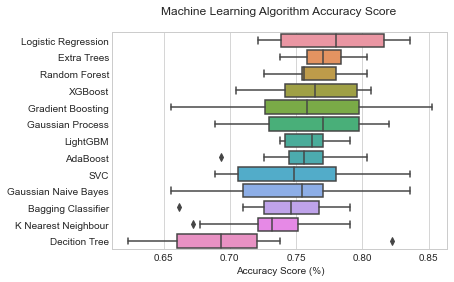

In [39]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# 중요도에 따라 모델 재설정

## 중요도 그래프로 보기

In [40]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style="whitegrid")
    ax = data.tail(n).plot(kind='barh')
    
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

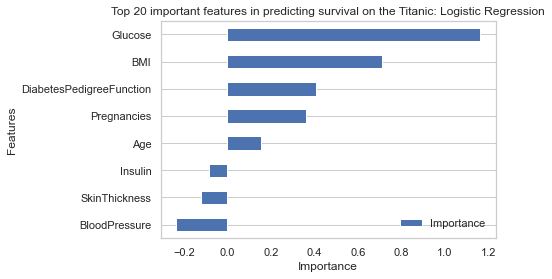

In [41]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':X.columns.tolist(), 'Importance':np.transpose(lr_clf.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)
# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

## 5개 모델의 컬럼들의 평균 중요도로 그래프로 보기

In [47]:
# 중요도가 제공되는 5가지 모델에 대한 항목 중요도 얻기
gb_clf_imp = pd.DataFrame({'Feature':X.columns, 'gb_clf importance':gb_clf.feature_importances_})
xgb_clf_imp = pd.DataFrame({'Feature':X.columns, 'xgb_clf importance':xgb_clf.feature_importances_})
rf_clf_imp = pd.DataFrame({'Feature':X.columns, 'rf_clf importance':rf_clf.feature_importances_})
ext_clf_imp = pd.DataFrame({'Feature':X.columns, 'ext_clf importance':ext_clf.feature_importances_})
ada_clf_imp = pd.DataFrame({'Feature':X.columns, 'ada_clf importance':ada_clf.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gb_clf_imp.merge(xgb_clf_imp, on='Feature').merge(rf_clf_imp, on='Feature').merge(ext_clf_imp, on='Feature').merge(ada_clf_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)
importances

,Feature,gb_clf importance,xgb_clf importance,rf_clf importance,ext_clf importance,ada_clf importance,Average
0,Glucose,0.410357,0.253918,0.264658,0.244615,0.26,0.286710
1,Diabet...,0.123361,0.107380,0.133477,0.123265,0.28,0.153497
2,BMI,0.183944,0.133953,0.167186,0.132112,0.14,0.151439
3,Age,0.143031,0.121763,0.135212,0.140508,0.10,0.128103
4,Pregna...,0.035768,0.088999,0.078803,0.107264,0.08,0.078167
5,BloodP...,0.032512,0.088183,0.087075,0.098502,0.06,0.073254
6,Insulin,0.047748,0.097951,0.069950,0.071945,0.06,0.069519
7,SkinTh...,0.023279,0.107851,0.063637,0.081790,0.02,0.059311


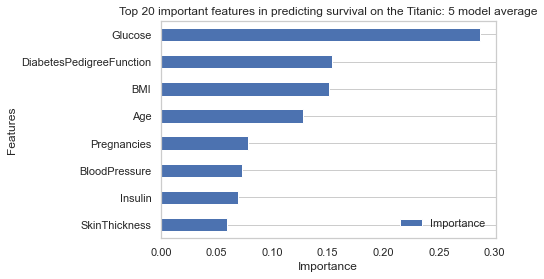

In [46]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

## 중요도에 따라 모델 재설정
* 전처리를 하고 scaling은 하지 않은 X 데이터를 집어 넣는다.

In [48]:
importance_1 = importance[-381:]
importance_1

,Importance
Features,
SkinThickness,0.059311
Insulin,0.069519
BloodPressure,0.073254
Pregnancies,0.078167
Age,0.128103
BMI,0.151439
DiabetesPedigreeFunction,0.153497
Glucose,0.286710


In [49]:
importance_1[371:381]

,Importance
Features,


In [50]:
# 영양가 있는 380개만 넣기
mylist = list(importance_1.index)

In [51]:
mylist

['SkinThickness',
 'Insulin',
 'BloodPressure',
 'Pregnancies',
 'Age',
 'BMI',
 'DiabetesPedigreeFunction',
 'Glucose']

In [52]:
X_1 = pd.DataFrame()

for i in mylist:
    X_1[i] = X[i]
    
X_1.head()

,SkinThickness,Insulin,BloodPressure,Pregnancies,Age,BMI,DiabetesPedigreeFunction,Glucose
0,35,0,72,6,50,33.6,0.627,148
1,29,0,66,1,31,26.6,0.351,85
2,0,0,64,8,32,23.3,0.672,183
3,23,94,66,1,21,28.1,0.167,89
4,35,168,40,0,33,43.1,2.288,137


In [53]:
# 모델의 변수를 다시 정의하고
# X_train = train
# X_test = test
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.2, random_state = 156, stratify=y)

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다시 머신러닝 모델 만들기(위의 코드랑 같음)

In [57]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(random_state=1)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()
gb_clf = GradientBoostingClassifier()
svc_clf = SVC(probability=True)
ext_clf = ExtraTreesClassifier()
ada_clf = AdaBoostClassifier()
gnb_clf = GaussianNB()
gp_clf = GaussianProcessClassifier()
bag_clf = BaggingClassifier()

# 리스트 준비
models = [dt_clf, rf_clf, knn_clf, lr_clf, xgb_clf, lgbm_clf, gb_clf, svc_clf, ext_clf, ada_clf, gnb_clf, gp_clf, bag_clf]         
model_names = ['Decition Tree', 'Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 이어서 연속적으로 모델을 학습 시키고 교차 검증합니다.
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

[16:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## 결과 : 테이블로 보기

In [58]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)
results

,0,1,2,3,4,5,6,7,8,9,mean
Decition Tree,0.725806,0.790323,0.741935,0.645161,0.606557,0.639344,0.622951,0.770492,0.655738,0.655738,0.685405
Random Forest,0.741935,0.774194,0.806452,0.758065,0.737705,0.737705,0.754098,0.803279,0.819672,0.754098,0.768720
K Nearest Neighbour,0.790323,0.725806,0.741935,0.677419,0.754098,0.737705,0.672131,0.721311,0.770492,0.721311,0.731253
Logistic Regression,0.725806,0.806452,0.790323,0.741935,0.819672,0.770492,0.737705,0.819672,0.836066,0.721311,0.776943
XGBoost,0.774194,0.806452,0.758065,0.725806,0.754098,0.704918,0.754098,0.754098,0.786885,0.754098,0.757271
LightGBM,0.774194,0.741935,0.741935,0.741935,0.770492,0.770492,0.737705,0.754098,0.770492,0.770492,0.757377
Gradient Boosting,0.758065,0.806452,0.774194,0.725806,0.770492,0.737705,0.721311,0.836066,0.852459,0.639344,0.762189
SVC,0.709677,0.758065,0.741935,0.693548,0.786885,0.754098,0.688525,0.819672,0.836066,0.704918,0.749339
Extra Trees,0.725806,0.774194,0.758065,0.725806,0.803279,0.721311,0.704918,0.803279,0.819672,0.737705,0.757403
AdaBoost,0.725806,0.758065,0.741935,0.693548,0.754098,0.754098,0.770492,0.770492,0.786885,0.803279,0.755870


## 결과 : 그래프(boxplot)으로 보기

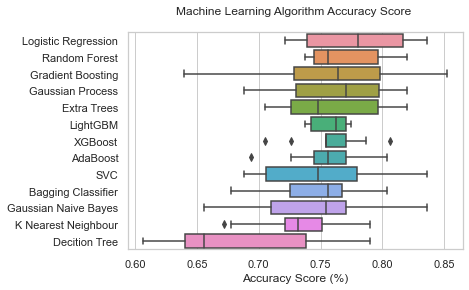

In [59]:
# 그래프로 표현
result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# 하이퍼 파라미터 튜닝

## DecisionTree

In [80]:
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.7540717046514728
{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 10}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished


## SVC
* Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid이다
* fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.

* bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형
* c값과 gamma값은 10의 배수로 일반적으로 한다.
* 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다. 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
* C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거합니다. C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
* Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
* cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [81]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
display(pd.DataFrame(gd.cv_results_))
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


0.7752499000399841
{'C': 50, 'gamma': 0.001}


[Parallel(n_jobs=-1)]: Done  89 out of 120 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished


## Gradient Boosting Classifier
* learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
* n_estimator는 각 경우의 트리 숫자입니다.

In [82]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100, 1000, 2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  44 out of  75 | elapsed:    3.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.1s finished


0.7589497534319605
{'learning_rate': 0.05, 'n_estimators': 1000}


## Logistic Regression
* Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression이라고하고 L2를 사용하는 모델을 Ridge Regression이라고합니다. 이 둘의 주요 차이점은 페널티입니다. 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다. L2-norm이 오차를 제곱하기 때문에 (오류> 1 인 경우 로트가 증가 함) 모델은 L1-norm보다 훨씬 큰 오차 (e vs e ^ 2)를 보게되므로 훨씬 더 민감합니다. 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
* C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것입니다.

In [83]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.7785019325603092
{'C': 7.742636826811269, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


## XGBoost

### XGBoost Step 1.

In [84]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s


[16:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7540983606557378
{'learning_rate': 0.2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   19.1s finished


### XGB Step 2.

In [85]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


[16:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.767119818739171
{'max_depth': 3, 'min_child_weight': 6}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.8s finished


### XGB Step 3.

In [86]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.1s remaining:    0.0s


[16:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7638144742103159
{'gamma': 0.2}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


### XGB Step 4

In [87]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.4s


[16:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7638677862188457
{'colsample_bytree': 0.9, 'subsample': 0.65}


[Parallel(n_jobs=-1)]: Done 374 out of 405 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.0s finished


### XGB Step 5

In [88]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


[16:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7573503931760628
{'reg_alpha': 0.01}


## LightGBM

### LightGBM Step 1.

In [89]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = LGBMClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s


0.7589897374383581
{'learning_rate': 0.05, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   19.2s finished


### LightGBM Step 2.

In [90]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = LGBMClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


0.7687591630014661
{'max_depth': 3, 'min_child_weight': 6}


[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.9s finished


### LightGBM Step 3.

In [91]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = LGBMClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7573637211781954
{'gamma': 0.0}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


### LightGBM Step 4

In [92]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = LGBMClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.5s


0.7622151139544182
{'colsample_bytree': 0.6, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 374 out of 405 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    2.1s finished


### LightGBM Step 5

In [93]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = LGBMClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.7606290817006531
{'reg_alpha': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


## Gaussian Process

In [94]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


0.7590297214447554
{'max_iter_predict': 2, 'n_restarts_optimizer': 0, 'warm_start': True}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    5.4s finished


## Adaboost.

In [95]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s


0.7655071304811408
{'learning_rate': 0.5, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.0s finished


## KNN

In [96]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.7329201652672264
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


## Random Forest.

In [97]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.5s


0.7736372117819539
{'max_depth': None, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    8.0s finished


## Extra Trees

In [98]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    2.4s


0.7801412768226043
{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    3.9s finished


## Bagging Classifier

In [99]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 594 out of 625 | elapsed:    7.9s remaining:    0.3s


0.7768892443022791
{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:    8.6s finished


# 다시 하이퍼파라미터 넣은 머신러닝 모델 만들기(재 트레이닝)

In [100]:
#  튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
dt_clf = DecisionTreeClassifier(max_depth=None, max_features=0.5, min_samples_leaf=10, min_samples_split=10)

rf_clf = RandomForestClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, weights='distance')

log = LogisticRegression(C=59.94842503189409, penalty='l2')

xgb = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

lgbm_clf = LGBMClassifier(max_depth=3, min_child_weight=6)

gbc = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=1000)

svc = SVC(probability=True, gamma=0.001, C=1)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.1, min_samples_leaf=2, min_samples_split=10, n_estimators=75, random_state=1)

ada = AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=0.5, max_samples=1.0, n_estimators=10, random_state=1)

# 리스트
models = [dt_clf, rf_clf, knn_clf, lr_clf, xgb_clf, lgbm_clf, gb_clf, svc_clf, ext_clf, ada_clf, gnb_clf, gp_clf, bag_clf]         
model_names = ['Decition Tree', 'Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}


# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

[16:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## 결과 : 테이블로 보기

In [101]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df

,0,1,2,3,4,5,6,7,8,9,mean
Logistic Regression,0.725806,0.806452,0.790323,0.741935,0.819672,0.770492,0.737705,0.819672,0.836066,0.721311,0.776943
Extra Trees,0.725806,0.774194,0.790323,0.709677,0.786885,0.754098,0.737705,0.786885,0.819672,0.803279,0.768852
Gaussian Process,0.741935,0.725806,0.806452,0.693548,0.770492,0.770492,0.688525,0.819672,0.819672,0.770492,0.760709
Gradient Boosting,0.758065,0.806452,0.758065,0.725806,0.770492,0.704918,0.721311,0.836066,0.852459,0.655738,0.758937
Random Forest,0.693548,0.790323,0.758065,0.725806,0.737705,0.786885,0.770492,0.819672,0.770492,0.721311,0.757430
XGBoost,0.774194,0.806452,0.758065,0.725806,0.754098,0.704918,0.754098,0.754098,0.786885,0.754098,0.757271
AdaBoost,0.725806,0.758065,0.741935,0.693548,0.754098,0.754098,0.770492,0.770492,0.786885,0.803279,0.755870
LightGBM,0.741935,0.806452,0.758065,0.725806,0.770492,0.770492,0.721311,0.770492,0.770492,0.704918,0.754045
SVC,0.709677,0.758065,0.741935,0.693548,0.786885,0.754098,0.688525,0.819672,0.836066,0.704918,0.749339
Gaussian Naive Bayes,0.725806,0.774194,0.758065,0.661290,0.836066,0.704918,0.754098,0.786885,0.754098,0.655738,0.741116


## 결과 : 그래프(boxplot)으로 보기

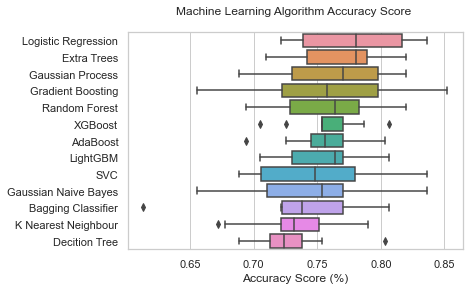

In [102]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# 마지막 보팅(알고리즘 뭘로 쓸지 결정)

## 하드 보팅

In [103]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Decition Tree', dt_clf),
                                           ('Random Forest', rf_clf), 
                                           ('Logistic Regression', lg_clf),
                                           ('XGBoost', xgb_clf),
                                           ('LightGBM', lgbm_clf),
                                           ('Gradient Boosting', gb_clf),
                                           ('Extra Trees', ext_clf),
                                           ('AdaBoost', ada_clf),
                                           ('Gaussian Process', gp_clf),
                                           ('SVC', svc_clf),
                                           ('K Nearest Neighbour', knn_clf),
                                           ('Bagging Classifier', bag_clf)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

[16:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## 소프트 보팅

In [104]:
grid_soft = VotingClassifier(estimators = [('Decition Tree', dt_clf),
                                           ('Random Forest', rf_clf), 
                                           ('Logistic Regression', lg_clf),
                                           ('XGBoost', xgb_clf),
                                           ('LightGBM', lgbm_clf),
                                           ('Gradient Boosting', gb_clf),
                                           ('Extra Trees', ext_clf),
                                           ('AdaBoost', ada_clf),
                                           ('Gaussian Process', gp_clf),
                                           ('SVC', svc_clf),
                                           ('K Nearest Neighbour', knn_clf),
                                           ('Bagging Classifier', bag_clf)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

[16:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# 마지막 모델 예측

## 하드보팅 예측

In [ ]:
# Final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

## 소프트보팅 예측

In [ ]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission2.csv', header = True, index = False)

# 평가

## 평가 함수 모음

In [106]:
def total_get_clf_eval(model, X_train, X_test, y_train, y_test, pred=None, pred_proba_c1=None):
    # 알고리즘
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba_c1 = model.predict_proba(X_test)[:, 1]
    # 평가 항목
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba_c1)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    # precision_recall_curve_plot
    precision_recall_curve_plot(y_test, pred_proba_c1)
    # roc_curve_plot
    roc_curve_plot(y_test , pred_proba_c1)
    
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
        
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

## 전체보기

Decition Tree 

오차 행렬
[[79 21]
 [28 26]]
정확도: 0.6818, 정밀도: 0.5532, 재현율: 0.4815,    F1: 0.5149, AUC:0.7831


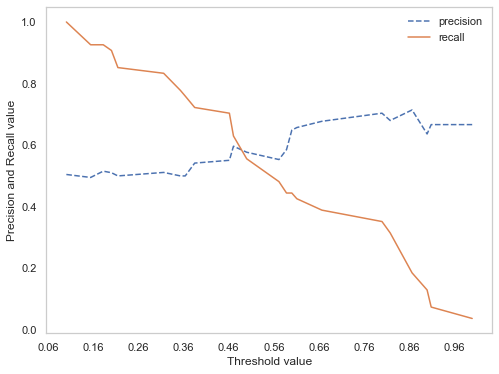

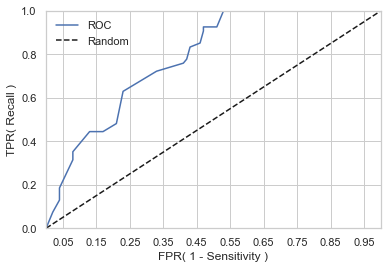

-------------------------------------------------------------------------------------------------
Random Forest 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200


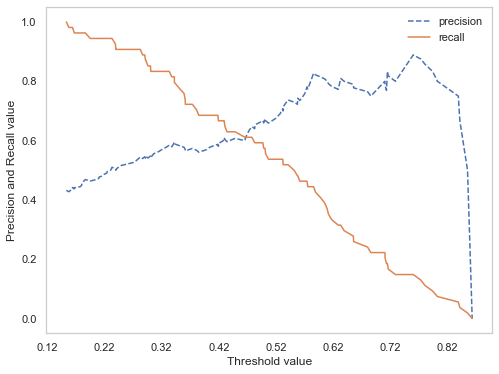

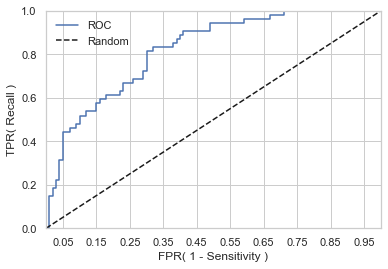

-------------------------------------------------------------------------------------------------
K Nearest Neighbour 

오차 행렬
[[79 21]
 [28 26]]
정확도: 0.6818, 정밀도: 0.5532, 재현율: 0.4815,    F1: 0.5149, AUC:0.7575


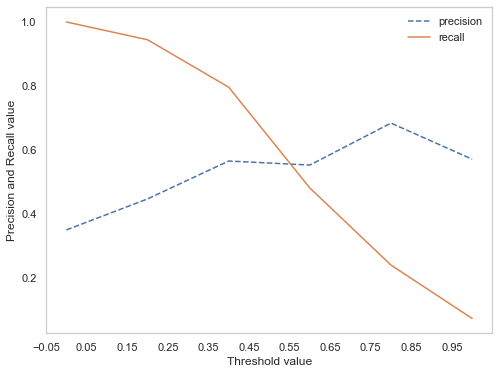

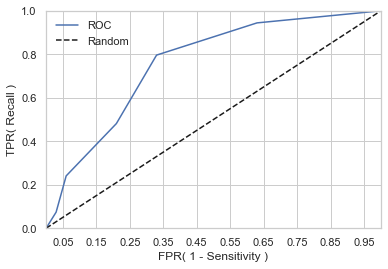

-------------------------------------------------------------------------------------------------
Logistic Regression 

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8059


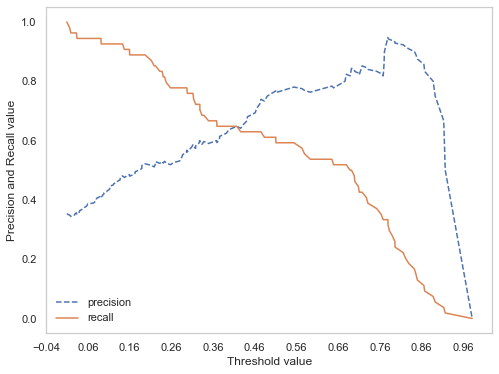

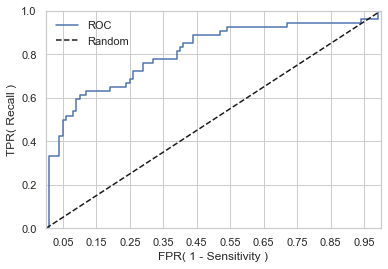

-------------------------------------------------------------------------------------------------
XGBoost 

[16:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[79 21]
 [25 29]]
정확도: 0.7013, 정밀도: 0.5800, 재현율: 0.5370,    F1: 0.5577, AUC:0.7796


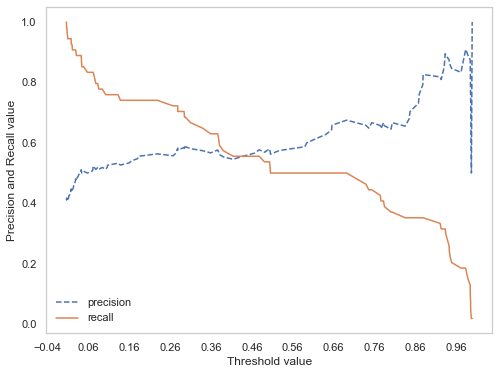

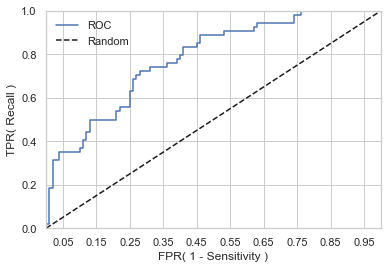

-------------------------------------------------------------------------------------------------
LightGBM 

오차 행렬
[[82 18]
 [26 28]]
정확도: 0.7143, 정밀도: 0.6087, 재현율: 0.5185,    F1: 0.5600, AUC:0.8231


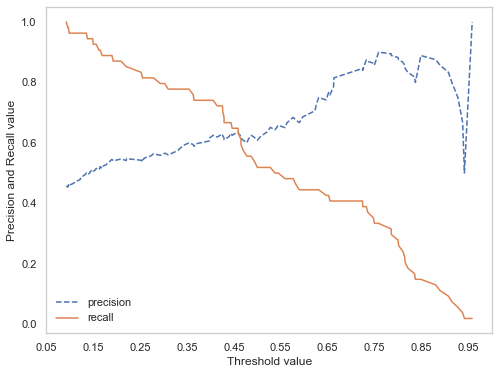

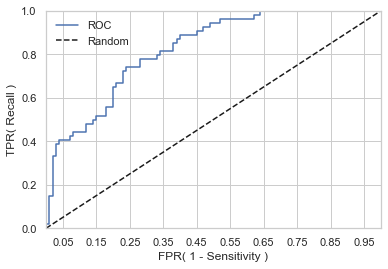

-------------------------------------------------------------------------------------------------
Gradient Boosting 

오차 행렬
[[80 20]
 [23 31]]
정확도: 0.7208, 정밀도: 0.6078, 재현율: 0.5741,    F1: 0.5905, AUC:0.8072


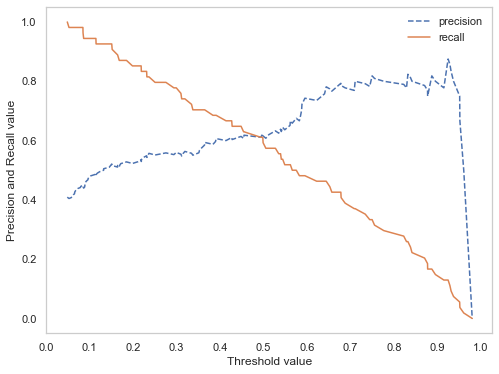

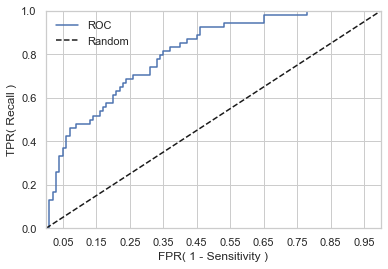

-------------------------------------------------------------------------------------------------
SVC 

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.8230


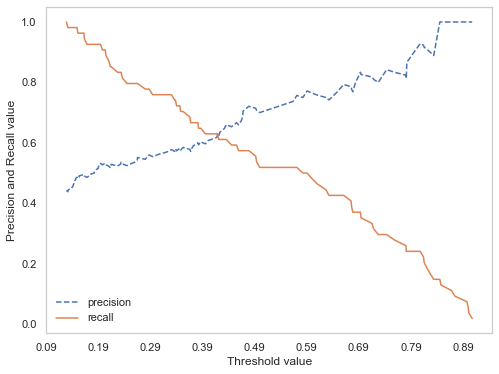

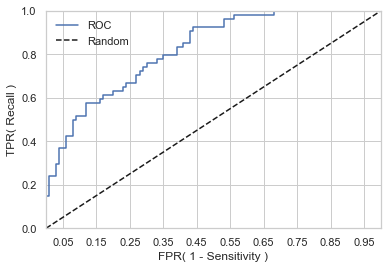

-------------------------------------------------------------------------------------------------
Extra Trees 

오차 행렬
[[86 14]
 [23 31]]
정확도: 0.7597, 정밀도: 0.6889, 재현율: 0.5741,    F1: 0.6263, AUC:0.7867


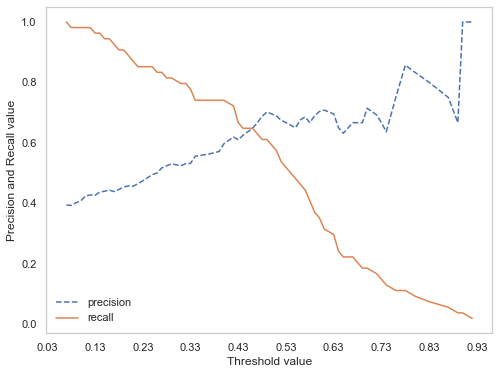

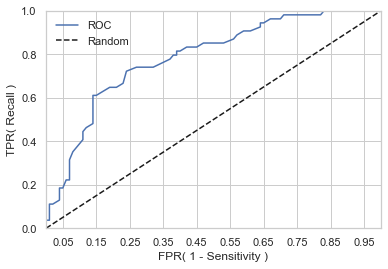

-------------------------------------------------------------------------------------------------
AdaBoost 

오차 행렬
[[81 19]
 [19 35]]
정확도: 0.7532, 정밀도: 0.6481, 재현율: 0.6481,    F1: 0.6481, AUC:0.7809


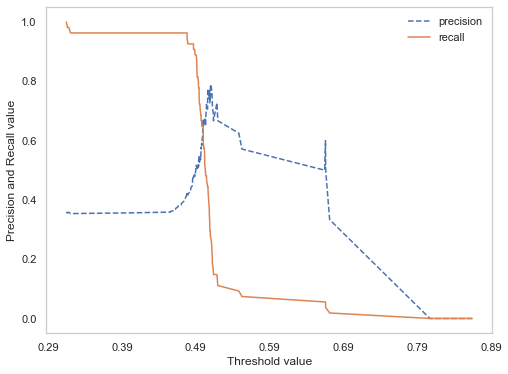

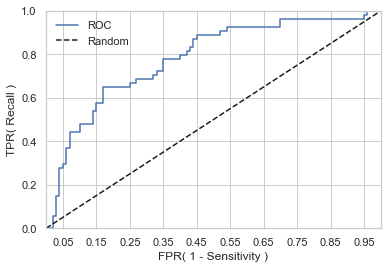

-------------------------------------------------------------------------------------------------
Gaussian Naive Bayes 

오차 행렬
[[86 14]
 [17 37]]
정확도: 0.7987, 정밀도: 0.7255, 재현율: 0.6852,    F1: 0.7048, AUC:0.8343


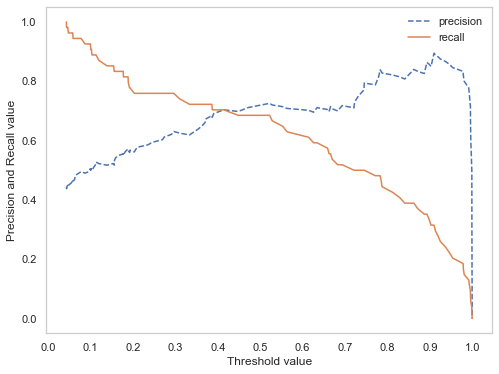

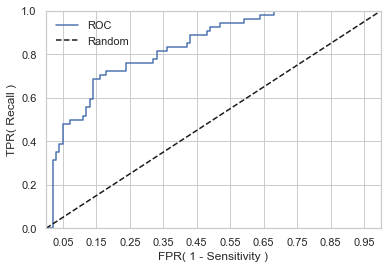

-------------------------------------------------------------------------------------------------
Gaussian Process 

오차 행렬
[[85 15]
 [27 27]]
정확도: 0.7273, 정밀도: 0.6429, 재현율: 0.5000,    F1: 0.5625, AUC:0.7954


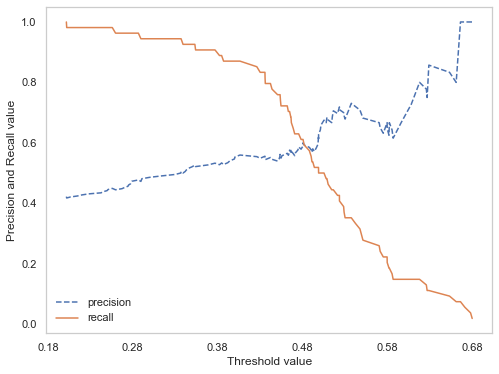

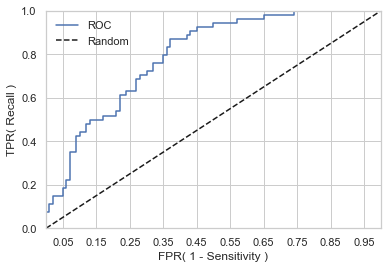

-------------------------------------------------------------------------------------------------
Bagging Classifier 

오차 행렬
[[88 12]
 [28 26]]
정확도: 0.7403, 정밀도: 0.6842, 재현율: 0.4815,    F1: 0.5652, AUC:0.7820


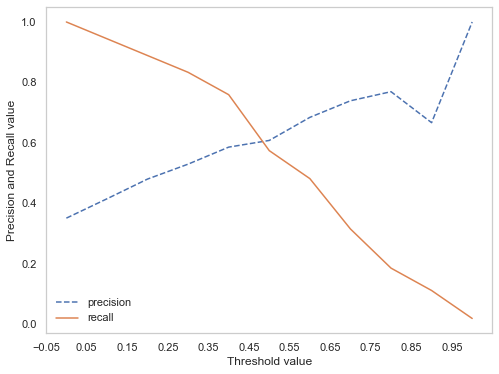

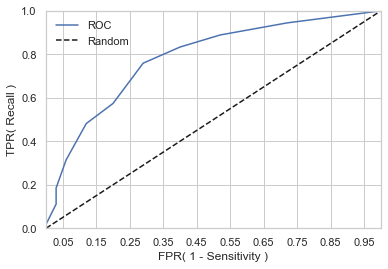

-------------------------------------------------------------------------------------------------


In [107]:
for i, model in enumerate(models):
    print(model_names[i],'\n')
    total_get_clf_eval(model, X_train, X_test, y_train, y_test, pred=None, pred_proba_c1=None)
    print('-------------------------------------------------------------------------------------------------\n')

## 모델별 보기

### 수치 평가

In [117]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(model, X_train, X_test, y_train, y_test, pred=None, pred_proba_c1=None):
    # 알고리즘
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba_c1 = model.predict_proba(X_test)[:, 1]
    # 평가 항목
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba_c1)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [119]:
get_clf_eval(rf_clf, X_train, X_test, y_train, y_test, pred=None, pred_proba_c1=None)

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200


### 임계값 조정 후 수치 평가
알고리즘 모델별로 임계값을 조정하면서 하나하나 봐야 함

In [120]:
from sklearn.preprocessing import Binarizer

# model = 모델약어, pred_proba_c1 = pred_proba로 예측 후 1번쨰 컬럼, thresholds = 
def get_eval_by_threshold(model, X_train, X_test, y_train, y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold,'\n')
        
        # roc_auc_score 관련 수정
        get_clf_eval(model, X_train, X_test, y_train, y_test, custom_predict, pred_proba_c1)
        print('-------------------------------------------------------------------------------------------------\n')

In [121]:
# 임계값을 변경해서 넣어야 함
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]

# 모델을 변경해서 넣어야 함
pred_proba_c1 = rf_clf.predict_proba(X_test)[:,1]
get_eval_by_threshold(rf_clf, X_train, X_test, y_train, y_test, pred_proba_c1.reshape(-1,1), thresholds)

임계값: 0.3 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200
-------------------------------------------------------------------------------------------------

임계값: 0.33 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200
-------------------------------------------------------------------------------------------------

임계값: 0.36 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200
-------------------------------------------------------------------------------------------------

임계값: 0.39 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200
-------------------------------------------------------------------------------------------------

임계값: 0.42 

오차 행렬
[[85 15]
 [23 31]]
정확도: 0.7532, 정밀도: 0.6739, 재현율: 0.5741,    F1: 0.6200, AUC:0.8200
-----------------------------------------------------------------------------------------------

### precision_recall_curve 그래프

In [108]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

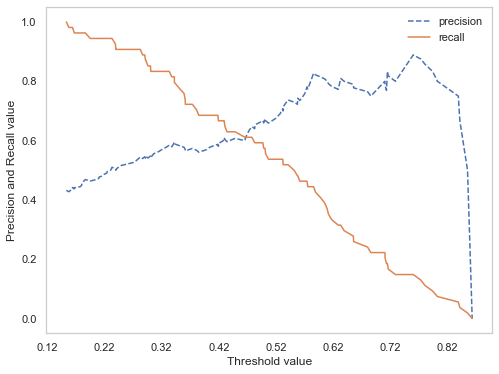

In [110]:
pred_proba_c1 = rf_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

### roc_curve 그래프

In [111]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

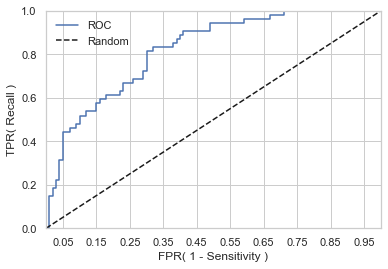

In [112]:
pred_proba_c1 = rf_clf.predict_proba(X_test)[:,1]
roc_curve_plot(y_test, pred_proba_c1)